# Collaborative Filtering

#### For this model there are to ways to approach it either by
    - by attributes
    - by user
    
    combined the two will lead to a better travel recommendation.

With the data provided I believe it would be best to combine the two.

### Here are the steps I am taking to creating the model
    - cleaning the data
    - finding similar users
    - creating a relationship Matrix
    - recommending location

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import numpy as np

#### Reading the original dataset

In [3]:
original_file = "../assets/dataset/original_google_review_ratings.csv"

In [4]:
original_file = pd.read_csv(original_file)

### Converting the file to a dataframe for manipulation and cleaning

In [5]:
original_df = pd.DataFrame(original_file)

In [6]:
original_df.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')

### Cleaning the data file.

#### We need to add the column names to the data file
#### the columns was provided seperately so we need to merge the two and re-index the whole data.

In [7]:
COLUMN_NAMES = ['user_id', 'churches', 'resorts', 'beaches',
                'parks', 'theatres', 'museums', 'malls', 'zoo',
                'restaurants', 'pubs_bars', 'local_services',
                'burger_pizza_shops', 'hotels_other_lodgings',
                'juice_bars', 'art_galleries', 'dance_clubs',
                 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas',
                'cafes', 'view_points', 'monuments', 'gardens', 'Unnamed: 25']

In [8]:
original_df.columns = COLUMN_NAMES

In [9]:
original_df.columns

Index(['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres',
       'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens',
       'Unnamed: 25'],
      dtype='object')

### We neeed now to write it to a new data file

In [10]:
original_df.to_csv('../assets/dataset/Google_reviews_ratings.csv')

##### Calling the data set from data-set folder

In [11]:
data_file = '../assets/dataset/Google_reviews_ratings.csv'

In [12]:
file = pd.read_csv(data_file)
file.head()

,Unnamed: 0,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
0,0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [13]:
# dataframe
df = pd.DataFrame(file)
df

,Unnamed: 0,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
0,0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


### Droping the first columns and cleaning any null values

In [14]:
df.columns

Index(['Unnamed: 0', 'user_id', 'churches', 'resorts', 'beaches', 'parks',
       'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars',
       'local_services', 'burger_pizza_shops', 'hotels_other_lodgings',
       'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms',
       'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments',
       'gardens', 'Unnamed: 25'],
      dtype='object')

In [15]:
# with jupyter notebook caching you can run only this
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Unnamed: 25'], axis=1)

In [16]:
df.head()

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [17]:
df.dropna()

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


#### After cleaning with no-null values its best pracice to visulize the data

In [18]:
df.corr()

/tmp/ipykernel_23413/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
churches,1.000000,0.248991,0.148805,0.070692,0.035451,-0.093143,-0.264632,-0.181267,-0.290214,-0.274683,...,-0.134914,0.067285,0.130099,0.160360,0.180271,0.199397,0.309238,0.364375,0.407033,0.489260
resorts,0.248991,1.000000,0.325011,0.167338,0.153520,0.053916,-0.050158,-0.004500,-0.050550,-0.092526,...,-0.066670,-0.033119,-0.077146,-0.025446,0.032529,0.096974,0.088990,0.018366,0.077616,0.125172
beaches,0.148805,0.325011,1.000000,0.396786,0.329925,0.161242,-0.072713,-0.186308,-0.219842,-0.179090,...,-0.134203,-0.022249,-0.084643,-0.119810,-0.075402,-0.009202,0.001105,0.134571,0.117458,0.082669
parks,0.070692,0.167338,0.396786,1.000000,0.626868,0.315354,-0.067914,-0.128064,-0.169442,-0.115515,...,-0.272130,0.018274,-0.132468,-0.183849,-0.192665,-0.092453,-0.056226,0.276727,0.173550,0.090533
theatres,0.035451,0.153520,0.329925,0.626868,1.000000,0.489937,0.077807,-0.002595,-0.170430,-0.100191,...,-0.323902,-0.056347,-0.184345,-0.243357,-0.256987,-0.191997,-0.133433,0.124431,0.128055,0.098853
museums,-0.093143,0.053916,0.161242,0.315354,0.489937,1.000000,0.382774,0.200528,0.114719,-0.019007,...,-0.187512,-0.149295,-0.229604,-0.271354,-0.266608,-0.227362,-0.197454,-0.090481,-0.081109,-0.066423
malls,-0.264632,-0.050158,-0.072713,-0.067914,0.077807,0.382774,1.000000,0.406959,0.432054,0.256563,...,0.092527,-0.142861,-0.207275,-0.226475,-0.272979,-0.232408,-0.257728,-0.360287,-0.223080,-0.247569
zoo,-0.181267,-0.004500,-0.186308,-0.128064,-0.002595,0.200528,0.406959,1.000000,0.536870,0.551409,...,-0.064692,-0.124417,-0.202950,-0.236106,-0.281018,-0.254393,-0.274733,-0.255520,-0.167927,-0.137292
restaurants,-0.290214,-0.050550,-0.219842,-0.169442,-0.170430,0.114719,0.432054,0.536870,1.000000,0.564086,...,0.126720,-0.119844,-0.229585,-0.266700,-0.271881,-0.164033,-0.185958,-0.268053,-0.268314,-0.326574
pubs_bars,-0.274683,-0.092526,-0.179090,-0.115515,-0.100191,-0.019007,0.256563,0.551409,0.564086,1.000000,...,0.038084,-0.031927,-0.212346,-0.273837,-0.324115,-0.247502,-0.230389,-0.183660,-0.213030,-0.263505


In [19]:
overlap_users = {}

In [20]:
len(df)

5456

In [21]:
cols = df.columns.to_list()

In [22]:
user_intrests = {
    'dance_clubs' : 5,
    'gyms' : 5,
    'gardens' : 5,
    'monuments': 5,
    'cafes' : 5
}
# np.array(user_intrests)

In [112]:
intrests = [
    'dance_clubs',
    'gyms',
    'gardens',
    'monuments',
    'cafes'
]

In [23]:
cols = [val for val in df.columns if val != "user_id"]
cols

['churches',
 'resorts',
 'beaches',
 'parks',
 'theatres',
 'museums',
 'malls',
 'zoo',
 'restaurants',
 'pubs_bars',
 'local_services',
 'burger_pizza_shops',
 'hotels_other_lodgings',
 'juice_bars',
 'art_galleries',
 'dance_clubs',
 'swimming_pools',
 'gyms',
 'bakeries',
 'beauty_spas',
 'cafes',
 'view_points',
 'monuments',
 'gardens']

In [24]:
df["user_id"] = pd.Categorical(df['user_id']).codes

In [25]:
df.set_index(df['user_id'])
df.drop('user_id', axis='columns', inplace=True)

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
user_id,,,,,,,,,,,,,,,,,,,,,
0,0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1111,1111,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2222,2222,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3333,3333,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4444,4444,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,4948,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
4949,4949,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
4950,4950,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11


In [26]:
df[cols[2]].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5456 entries, 0 to 5455
Series name: beaches
Non-Null Count  Dtype  
--------------  -----  
5456 non-null   float64
dtypes: float64(1)
memory usage: 42.8 KB


In [ ]:
df.apply(pd.to_numeric)

In [34]:
val = df.gardens > 2
val

0       False
1       False
2       False
3       False
4       False
        ...  
5451    False
5452    False
5453    False
5454    False
5455    False
Name: gardens, Length: 5456, dtype: bool

In [39]:
df["churches"].max().astype(float)

5.0

In [40]:
overlap_users = {}

In [41]:
def get_user_id(column):
    return df.index[df[column]>2].to_list()

In [42]:
print(f"-- For example : {len(set(df.index[df['gyms']>2].to_list()))} people go to the Gym -- ")

-- For example : 329 people go to the Gym -- 


In [43]:
for col in cols:
    if col in user_intrests:
        # uid = get_user_id(col)
        if col not in overlap_users:
            overlap_users[col] = get_user_id(col)
        else:
            continue

In [44]:
import seaborn as sn
import matplotlib.pyplot as plt

/tmp/ipykernel_23413/221754715.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr())


<AxesSubplot: >

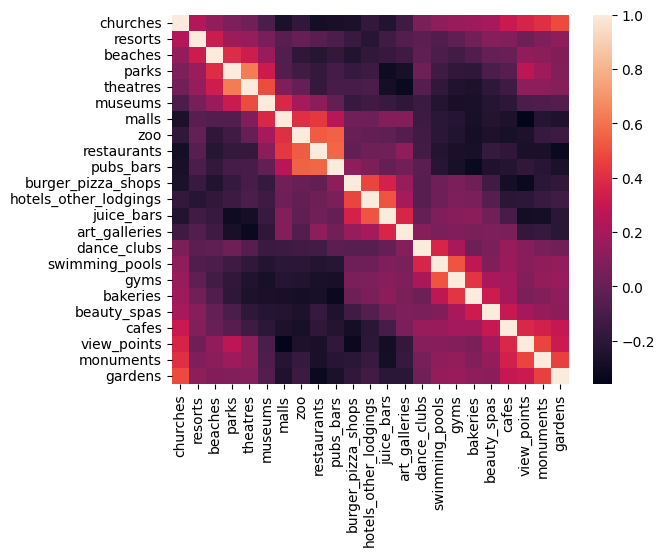

In [45]:
sn.heatmap(df.corr())

In [46]:
len(df.columns), len(df)

(24, 5456)

In [88]:
my_ratings = {}
my_ratings[5456] = user_intrests
my_ratings.keys()

dict_keys([5456])

In [89]:
mys = my_ratings[5456]
my_intrests = list(mys.keys())

In [90]:
for col in cols:
    if col not in my_intrests:
        mys[col] = 0
    elif col in my_intrests:
        continue

In [91]:
mys

{'dance_clubs': 5,
 'gyms': 5,
 'gardens': 5,
 'monuments': 5,
 'cafes': 5,
 'churches': 0,
 'resorts': 0,
 'beaches': 0,
 'parks': 0,
 'theatres': 0,
 'museums': 0,
 'malls': 0,
 'zoo': 0,
 'restaurants': 0,
 'pubs_bars': 0,
 'local_services': 0,
 'burger_pizza_shops': 0,
 'hotels_other_lodgings': 0,
 'juice_bars': 0,
 'art_galleries': 0,
 'swimming_pools': 0,
 'bakeries': 0,
 'beauty_spas': 0,
 'view_points': 0}

In [92]:
from collections import OrderedDict
new_user_intrest_rating = dict(OrderedDict((col, mys[col]) for col in cols))

In [93]:
my_ratings[5456]  = new_user_intrest_rating

In [94]:
my_ratings

{5456: {'churches': 0,
  'resorts': 0,
  'beaches': 0,
  'parks': 0,
  'theatres': 0,
  'museums': 0,
  'malls': 0,
  'zoo': 0,
  'restaurants': 0,
  'pubs_bars': 0,
  'local_services': 0,
  'burger_pizza_shops': 0,
  'hotels_other_lodgings': 0,
  'juice_bars': 0,
  'art_galleries': 0,
  'dance_clubs': 5,
  'swimming_pools': 0,
  'gyms': 5,
  'bakeries': 0,
  'beauty_spas': 0,
  'cafes': 5,
  'view_points': 0,
  'monuments': 5}}

In [54]:
df.loc[len(df)] = new_user_intrest_rating

In [55]:
df.tail()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12
5455,0.95,4.07,5.00,2.82,2.80,2.57,2.42,1.02,1.74,0.96,...,0.85,0.64,0.62,0.63,0.78,5.00,1.08,5.0,5.0,1.17
5456,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,5.00,0.00,5.00,0.00,0.00,5.00,0.0,5.0,5.00


In [56]:
len(df.columns.to_list())

24

In [57]:
df.tail(1)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
5456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,5.0


In [58]:
relationship = df.corr()

/tmp/ipykernel_23413/3863700114.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  relationship = df.corr()


In [59]:
filtered_corr = df.where(relationship >= 0.4)

In [60]:
df.reset_index(inplace=True)

In [61]:
df = df.iloc[:, 1:-1]

In [62]:
df.index.name = "user_id"

In [63]:
relationship_thresh = 0.7

In [65]:
!pip install surprise

In [66]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader

In [67]:
reader = Reader(rating_scale=(1, 5))

In [68]:
algo = SVD()

In [69]:
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments
count,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,...,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000
mean,1.455454,2.319282,2.488875,2.796373,2.958398,2.892960,3.350781,2.540330,3.125446,2.832210,...,2.190460,2.206168,1.193498,0.949029,0.823179,0.969633,0.999888,0.966577,1.750216,1.532089
std,0.827763,1.421654,1.248156,1.309586,1.339533,1.282881,1.414091,1.111821,1.357337,1.308107,...,1.576821,1.716063,1.108102,0.973532,0.949510,1.203933,1.193858,0.931370,1.598763,1.317605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,...,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000
50%,1.340000,1.900000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,...,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000
75%,1.810000,2.680000,2.740000,4.090000,4.310000,3.840000,5.000000,3.190000,5.000000,3.530000,...,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [72]:
counts = df[df.columns[:]].astype(bool).sum(axis=0).sort_values()

In [73]:
counts

bakeries                 4410
gyms                     4440
beauty_spas              4560
cafes                    4853
swimming_pools           4977
view_points              5111
monuments                5155
churches                 5261
dance_clubs              5345
resorts                  5366
art_galleries            5452
beaches                  5452
restaurants              5456
pubs_bars                5456
local_services           5456
malls                    5456
hotels_other_lodgings    5456
juice_bars               5456
museums                  5456
theatres                 5456
parks                    5456
zoo                      5456
burger_pizza_shops       5456
dtype: int64

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
reviews = df[df.columns[:]].astype(bool).sum(axis=1).value_counts()

In [76]:
duplicates = df.count() -  df.drop_duplicates().count()

In [77]:
duplicates.describe()

count    23.0
mean      3.0
std       0.0
min       3.0
25%       3.0
50%       3.0
75%       3.0
max       3.0
dtype: float64

In [160]:
df.shape

(5457, 23)

#### Here are some selected categoried to cluster the data more effectivaly

In [161]:
cols = df.columns.to_list()

In [162]:
def calculate_rating(row):
    return (row['rating_1'] + row['rating_2']) / 2

In [163]:
places =  df.columns.to_list()

In [164]:
users = df.index.to_list()

In [165]:
ratings = {}
for user in users: 
    for place in places:
        ratings[user] = df.loc[user, place]
        
        if len(ratings) < 20:
            continue
        else:
            break

In [176]:
places_and_ratings = df.to_dict(orient='records')

In [ ]:
user

In [ ]:
for places in places_and_ratings

In [172]:
len(set(ratings))

5457

In [127]:
pivot_table = df.pivot_table(index=users, columns=[places], values='rating', aggfunc='mean')

KeyError: 'rating'

In [125]:
df.shape

(5457, 23)